# Define function to plot RMSE vs Training set size for K-fold CV


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size(X, y, k, features, jump, entries):
    
    entries -= entries%k
    X = X[:entries, :]
    y = y[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X = X.reshape(k*uval, features)
    y = y.reshape(k*uval)

    X_test = X[:uval]

    X_test = X_test.reshape(uval, features)
    X_test = np.append(arr = np.ones((uval, 1)), values = X_test, axis=1)
    y_test = y[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X_without_XTest = X[uval:, :]
    y_without_yTest = y[uval:]

    num = m
    RMSE = np.ones((m))
    RMSE_SD = np.ones((m))
    X_val = np.ones((m))

    for i in range(m):
        X_val[i] = (i+1)*jump
        RMSE_indi = np.ones((num))
        MSE = 0
        sqr_err = np.zeros((y_test.shape[0]))
        for j in range(num):
            X_train = X_without_XTest[j*jump:(i+j)*jump+(jump)]
            X_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X_train, axis=1)
        
            y_train = y_without_yTest[j*jump:(i+j)*jump+(jump)]
        
            xT = X_train.transpose();
            xTx = np.dot(xT, X_train)
            xTx_pinv = np.linalg.pinv(xTx)
            xTy = np.dot(xT, y_train)
            w = np.dot(xTx_pinv, xTy).reshape(features+1, 1)
        
            y_pred = np.dot(X_test,w).reshape(X_test.shape[0])
            sqr_err += abs(y_pred-y_test)**2
        
            RMSE_indi[j] = (np.mean(abs(y_pred-y_test)**2)**0.5)
        
        RMSE[i] = (np.mean(sqr_err))**0.5
        RMSE_SD[i] = RMSE_indi.std()
        num -= 1
    

    X_val = X_val.astype(int)

    plt.scatter(X_val, RMSE, color="black", s=10)
    plt.errorbar(X_val, RMSE, yerr=RMSE_SD, color="blue", ecolor="red", capsize=3)
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Train set size vs RMSE for k-fold cross validation")
    plt.show()
    
# entries = 500
# k=5
# jump = 40
# features = 200
# X, y = make_regression(n_samples = entries, n_features = features, noise = 50)

# k_fold_plot_RMSE_vs_training_set_size(X, y, k, features, jump, entries)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math

def k_fold_plot_RMSE_vs_training_set_size_double(X1, y1, X2, y2, k, features, jump, entries):
    
    entries -= entries%k
    X1 = X1[:entries, :]
    y1 = y1[:entries]
    X2 = X2[:entries, :]
    y2 = y2[:entries]
    
    uval = math.floor(entries/k)
    test_ratio = math.floor(uval/100)
    train_ratio = 1 - test_ratio
    n = math.floor(features/jump)
    m = math.floor((entries-uval)/jump)

    X1 = X1.reshape(k*uval, features)
    y1 = y1.reshape(k*uval)
    X2 = X2.reshape(k*uval, features)
    y2 = y2.reshape(k*uval)

    X1_test = X1[:uval]
    X2_test = X2[:uval]

    X1_test = X1_test.reshape(uval, features)
    X1_test = np.append(arr = np.ones((uval, 1)), values = X1_test, axis=1)
    y1_test = y1[:uval]
    
    X2_test = X2_test.reshape(uval, features)
    X2_test = np.append(arr = np.ones((uval, 1)), values = X2_test, axis=1)
    y2_test = y2[:uval]

    TRMSE_SD = np.ones((k-1, 1))
    RMSE = np.ones((k-1))

    X1_without_X1Test = X1[uval:, :]
    y1_without_y1Test = y1[uval:]
    
    X2_without_X2Test = X2[uval:, :]
    y2_without_y2Test = y2[uval:]

    num = m
    
    RMSE1 = np.ones((m))
    RMSE_SD1 = np.ones((m))
    X1_val = np.ones((m))
    
    RMSE2 = np.ones((m))
    RMSE_SD2 = np.ones((m))
    X2_val = np.ones((m))

    for i in range(m):
        X1_val[i] = (i+1)*jump
        X2_val[i] = (i+1)*jump
        RMSE1_indi = np.ones((num))
        RMSE2_indi = np.ones((num))
        MSE1 = 0
        MSE2 = 0
        sqr_err1 = np.zeros((y1_test.shape[0]))
        sqr_err2 = np.zeros((y2_test.shape[0]))
        
        for j in range(num):
            X1_train = X1_without_X1Test[j*jump:(i+j)*jump+(jump)]
            X1_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X1_train, axis=1)
            
            X2_train = X2_without_X2Test[j*jump:(i+j)*jump+(jump)]
            X2_train = np.append(arr = np.ones(((i+1)*jump,1)), values = X2_train, axis=1)
        
            y1_train = y1_without_y1Test[j*jump:(i+j)*jump+(jump)]
            y2_train = y2_without_y2Test[j*jump:(i+j)*jump+(jump)]
        
            x1T = X1_train.transpose()
            x1Tx1 = np.dot(x1T, X1_train)
            x1Tx1_pinv = np.linalg.pinv(x1Tx1)
            
            x2T = X2_train.transpose()
            x2Tx2 = np.dot(x2T, X2_train)
            x2Tx2_pinv = np.linalg.pinv(x2Tx2)
            
            x1Ty1 = np.dot(x1T, y1_train)
            x2Ty2 = np.dot(x2T, y2_train)
            
            w1 = np.dot(x1Tx1_pinv, x1Ty1).reshape(features+1, 1)
            w2 = np.dot(x2Tx2_pinv, x2Ty2).reshape(features+1, 1)
        
            y1_pred = np.dot(X1_test,w1).reshape(X1_test.shape[0])
            y2_pred = np.dot(X2_test,w2).reshape(X2_test.shape[0])
            
            sqr_err1 += abs(y1_pred-y1_test)**2
            sqr_err2 += abs(y2_pred-y2_test)**2
        
            RMSE1_indi[j] = (np.mean(abs(y1_pred-y1_test)**2)**0.5)
            RMSE2_indi[j] = (np.mean(abs(y2_pred-y2_test)**2)**0.5)
        
        RMSE1[i] = (np.mean(sqr_err1))**0.5
        RMSE_SD1[i] = RMSE1_indi.std()
        RMSE2[i] = (np.mean(sqr_err2))**0.5
        RMSE_SD2[i] = RMSE2_indi.std()
        num -= 1
    

    X1_val = X1_val.astype(int)
    X2_val = X1_val.astype(int)

    plt.scatter(X1_val, RMSE1, color="black", s=10)
    plt.errorbar(X1_val, RMSE1, yerr=RMSE_SD1, color="blue", ecolor="red", capsize=3)
    
    plt.scatter(X2_val, RMSE2, color="blue", s=10)
    plt.errorbar(X2_val, RMSE2, yerr=RMSE_SD2, color="red", ecolor="black", capsize=3)
    
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Train set size vs RMSE for k-fold cross validation")
    plt.show()
    


# Finding weights and plotting graphs after applying Laplace mechanism

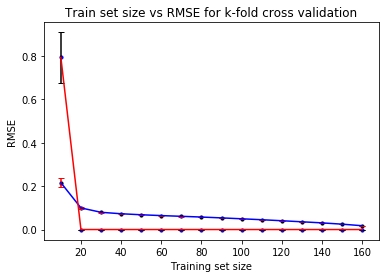

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
import math
from sklearn.preprocessing import normalize

entries = 200                       
features = 10    
d = features
elems = (d*(d+1))/2
epsilon = 1             

X,y = make_regression(n_samples = entries, n_features = features, noise = 10)

# X = normalize(X, norm='l1')
# y = y/sum(abs(y))

X = normalize(X, norm='l2')
d = (sum(y**2))**0.5
y = y/d

# jump = 10
# k = 5
# k_fold_plot_RMSE_vs_training_set_size(X, y, k, features, jump, entries)

X_with_bias = np.append(arr=np.ones((X.shape[0],1)) , values=X , axis=1)
xT = X_with_bias.transpose()
xTx = np.dot(xT, X_with_bias)
xTy = np.dot(xT, y)

b1 = elems/epsilon
b2 = d/epsilon

u = np.random.laplace(loc=0.0, scale=b1)
v = np.random.laplace(loc=0.0, scale=b2)

sTs = xTx + u
sTt = xTy + v

sTspinv = np.linalg.pinv(sTs)
wi = np.dot(sTspinv, sTt)

xTxpinv = np.linalg.pinv(xTx)
w = np.dot(xTxpinv, xTy)

T = np.dot(X_with_bias, wi)
# print(w.shape, wi.shape, X.shape, X_with_bias.shape)

jump = 10
k = 5
# k_fold_plot_RMSE_vs_training_set_size(X, T, k, features, jump, entries)
k_fold_plot_RMSE_vs_training_set_size_double(X, y, X, T, k, features, jump, entries)